In [3]:
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics
import time
import matplotlib.pyplot as plt
import numpy as np
import time

In [1]:
import panel

In [4]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','ipm4/sum','tt/AMPL','epix_2/ROI_0_sum'] #'epix10k2M/azav_azav'
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm','ipm5', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm',400.0)
xas.add_filter('simultaneous','ipm',400.0)
xas.add_filter('simultaneous','time_tool_ampl',0.001)
xas.scattering=True
xas.run_parser(['44 48 ']) # 7.5 uJ -0.5 to 2 ps
xas.mintime = -1
xas.maxtime = 1
xas.numpoints = 20
xas.verbose=True
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
end=time.time()
#print('Time binning: {} ps steps'.format(np.min(np.diff(xas.time_bins))))

/sdf/home/l/lbgee/mfx101338925/XSpect/XSpect/XSpect_Controller.py:126: UserWarning: If you plan on using delayed key loading for the epix then please define key_epix and friendly_name_epix. And do not load it here for risk of OOM
  warnings.warn('If you plan on using delayed key loading for the epix then please define key_epix and friendly_name_epix. And do not load it here for risk of OOM')


Starting primary analysis loop with experiment=<XSpect.XSpect_Analysis.spectroscopy_experiment object at 0x7fd01409d550>, verbose=False.
Primary analysis loop completed.


/sdf/home/l/lbgee/mfx101338925/XSpect/XSpect/XSpect_Visualization.py:336: RuntimeWarning: invalid value encountered in divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on
/sdf/home/l/lbgee/mfx101338925/XSpect/XSpect/XSpect_Visualization.py:337: RuntimeWarning: invalid value encountered in divide
  laser_off_spectrum=np.divide(np.nansum(xas_analysis.summed_laser_off,axis=0),np.nansum(xas_analysis.summed_norm_off,axis=0))


(-0.75, 0.75)

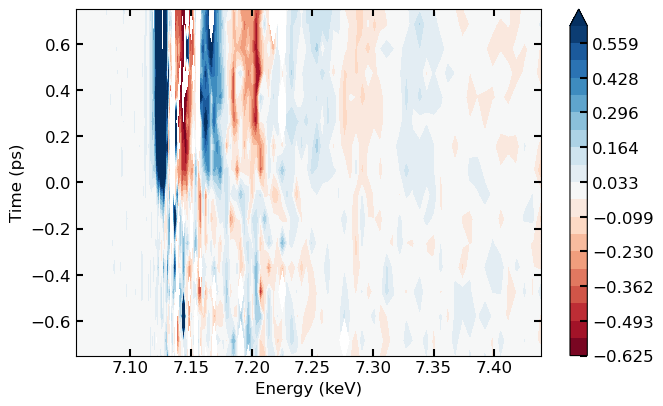

In [13]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned',interpolate=True)


v.plot_2d_difference_spectrum(xas,vmin=-1.25,vmax=1.25)


#plt.axvline(7.1245, color = 'r')
plt.ylim(-0.75,0.75)

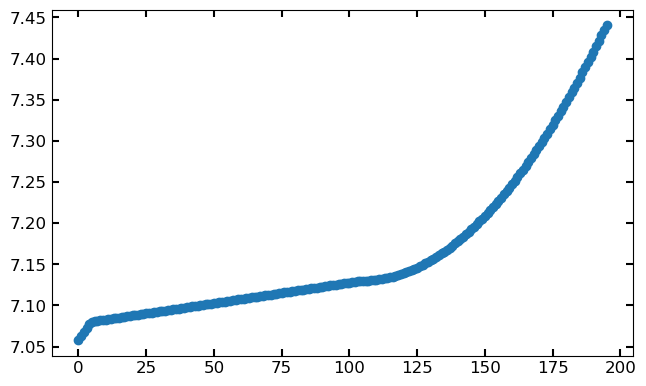

In [27]:
plt.plot(xas.analyzed_runs[0].ccm_bins,'o-')
#xas.analyzed_runs[0].ccm_bin_indices_xray_not_laser

In [5]:
xas.aggregate_statistics()

In [8]:
xas.run_statistics

{44: {'Total': 60171,
  'X-ray Total': 59733,
  'Laser Total': 42979,
  'Percent_XES_Hits': 0.0},
 48: {'Total': 65358,
  'X-ray Total': 62515,
  'Laser Total': 46686,
  'Percent_XES_Hits': 0.0}}

In [9]:
xas.status_datetime

['2025-10-20 22:32:51',
 '2025-10-20 22:32:51',
 '2025-10-20 22:32:51',
 '2025-10-20 22:32:51',
 '2025-10-20 22:32:51',
 '2025-10-20 22:32:51',
 '2025-10-20 22:32:52']

In [12]:
for x,y in zip (xas.status_datetime,xas.status):
    print(x,y)

2025-10-20 22:32:51 Setting key aliases.
2025-10-20 22:32:51 Adding filter: Shot Type=xray, Filter Key=ipm, Threshold=400.0
2025-10-20 22:32:51 Adding filter: Shot Type=simultaneous, Filter Key=ipm, Threshold=400.0
2025-10-20 22:32:51 Adding filter: Shot Type=simultaneous, Filter Key=time_tool_ampl, Threshold=0.001
2025-10-20 22:32:51 Parsing run array.
2025-10-20 22:32:51 Starting primary analysis loop with experiment=<XSpect.XSpect_Analysis.spectroscopy_experiment object at 0x7fd01409d550>, verbose=False.
2025-10-20 22:32:52 Primary analysis loop completed.


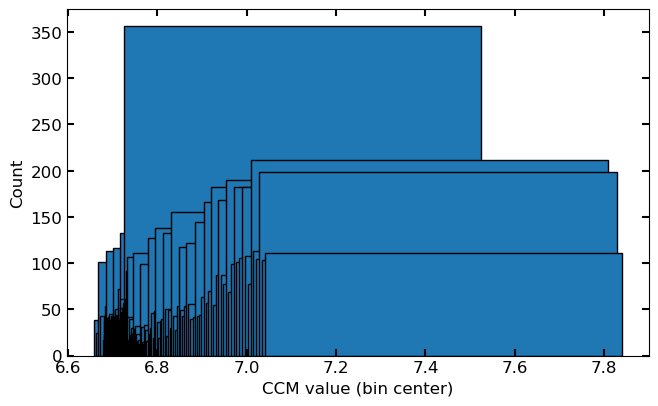

In [18]:
n_bins = len(xas.analyzed_runs[0].ccm_bins)
valid = (xas.analyzed_runs[0].ccm_bin_indices_xray_not_laser >= 0) & (xas.analyzed_runs[0].ccm_bin_indices_xray_not_laser < n_bins)  # ignore out-of-range indices like -1
counts = np.bincount(xas.analyzed_runs[0].ccm_bin_indices_xray_not_laser[valid], minlength=n_bins)

plt.bar(xas.analyzed_runs[0].ccm_bins, counts, align='center', edgecolor='black')
plt.xlabel('CCM value (bin center)')
plt.ylabel('Count')
plt.show()

In [19]:
np.shape

NameError: name 'bins' is not defined